# Principal Component Analysis (PCA) 

Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
# from sklearn.manifold import TSNE
# from bioinfokit.visuz import cluster

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"wine.csv")
print("Shape:",data.shape)
data.head()

Shape: (178, 14)


Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

### EDA and Data Visualization

In [4]:
print('\n Describe:');   print(data.describe())
print('\n Info:');   print(data.info())
print('\n Null values:');   print(data.isnull().sum())
print('\n Duplicated:');   print(data[data.duplicated()])


 Describe:
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.9988

## Variable check

### Find columns with the same values

In [5]:
# Find columns with the same values
columns_with_same_values = data.columns[data.nunique() == 1].tolist()

for column in columns_with_same_values:
    unique_values = data[column].unique()
    print(f"Unique values in the '{column}' column:")
    print(unique_values)
    print()

# excluding columns_with_same_values
data = data.drop(columns=columns_with_same_values)
print("excluded columns_with_same_values, nos:",columns_with_same_values ,",Final shape:", data.shape)

excluded columns_with_same_values, nos: [] ,Final shape: (178, 14)


In [6]:
# Discrete Variables Count
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))
print(discrete_feature)

# Continuous Feature Count
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('\nContinuous Feature Count {}'.format(len(continuous_feature)))
print(continuous_feature)

# Other Features Count
other_feature = [feature for feature in data.columns if feature not in discrete_feature and feature not in continuous_feature]
print('\nOther Features Count: {}'.format(len(other_feature)))
print('Other Features: {}'.format(other_feature))

# Numeric Data
numeric_data = data.select_dtypes(include='number')
print('\nNumeric Data Shape:', numeric_data.shape)
print(numeric_data.columns)

# Categorical Data
categorical_data = data.select_dtypes(include='object')
print('\nCategorical Data Shape:', categorical_data.shape)
print('Categorical Columns:', categorical_data.columns)

Discrete Variables Count: 1
['Type']

Continuous Feature Count 13
['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']

Other Features Count: 0
Other Features: []

Numeric Data Shape: (178, 14)
Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

Categorical Data Shape: (178, 0)
Categorical Columns: Index([], dtype='object')


## Categorical Data

Bar plot for all categorical

Labelencoder to convert categorical data into numeric

## Numeric Data

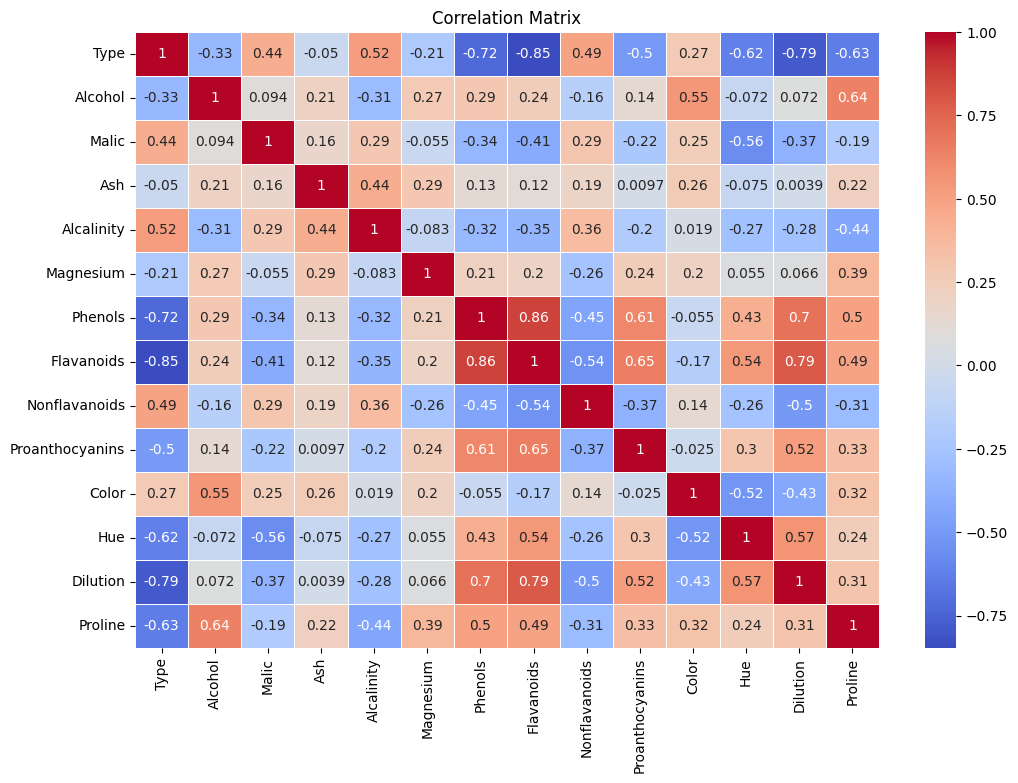

In [7]:
# Correlation Plot
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### visualization

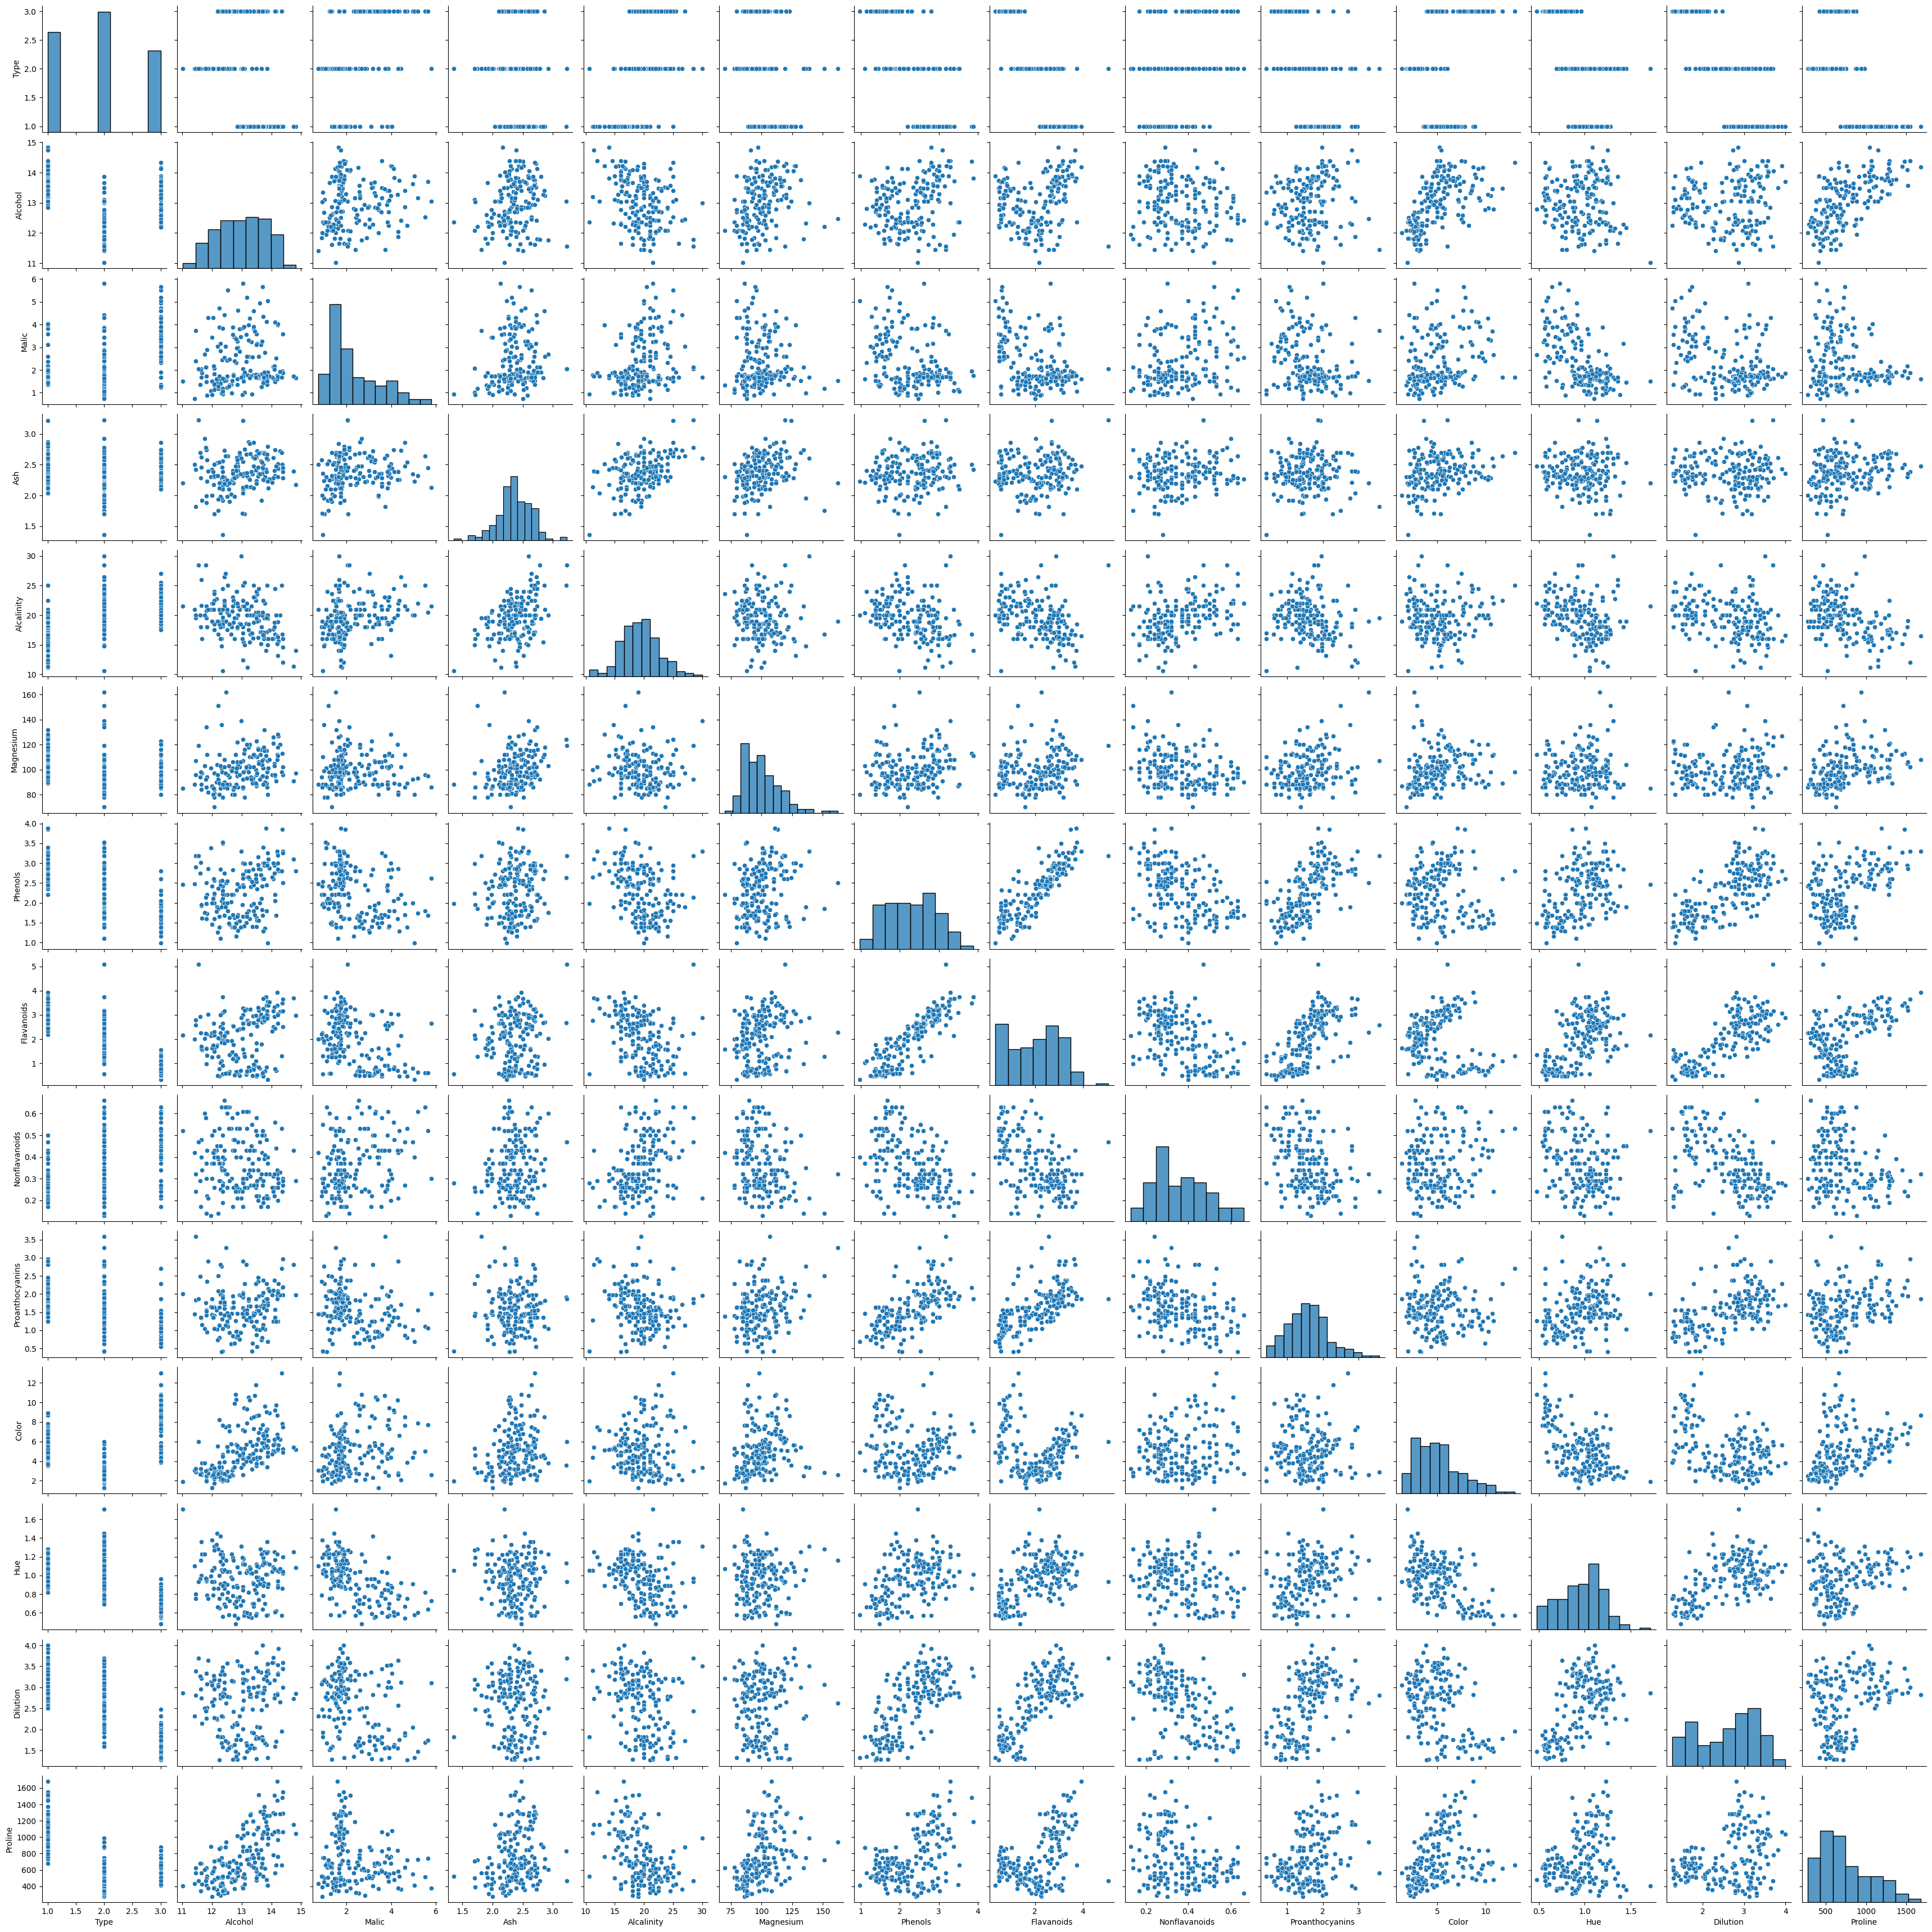

In [8]:
# relationship plot for numeric data
sns.pairplot(data= numeric_data)
plt.show()

### Detect outliers and handle them

In [9]:
data_filtered=pd.concat([numeric_data],axis=1)    #,cat_data ,numeric_data, data_2
data_filtered.shape

(178, 14)

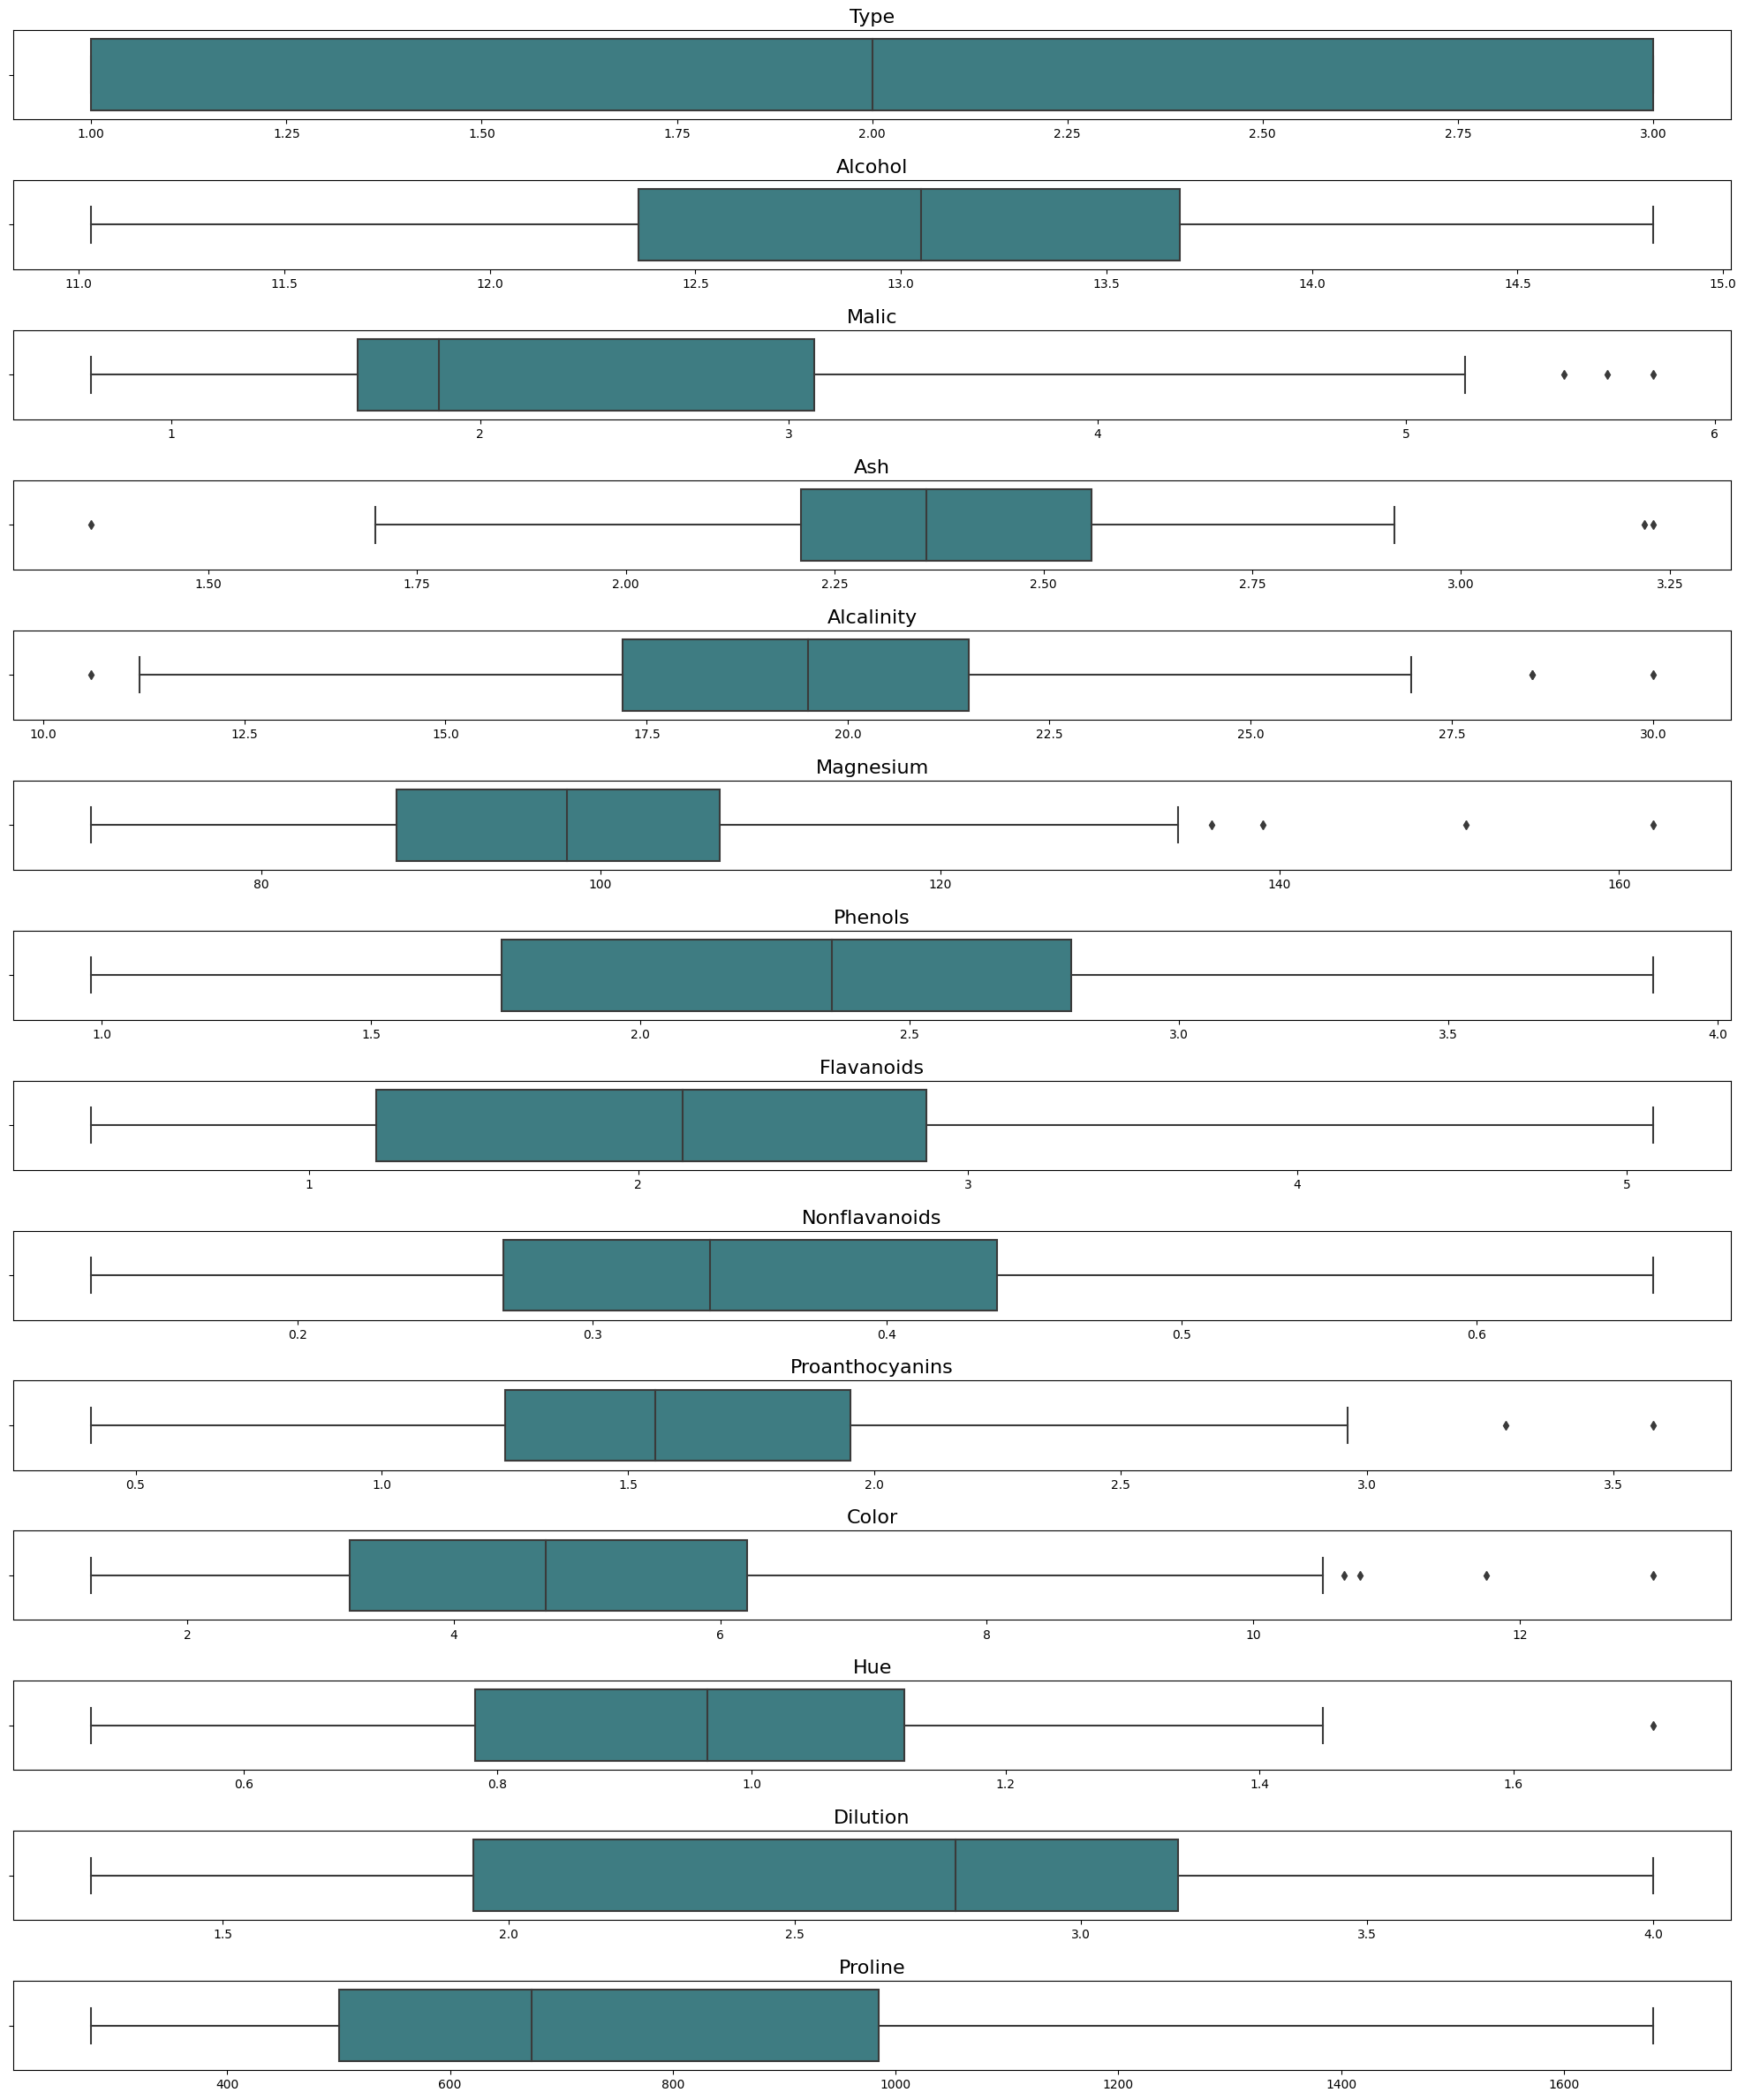

In [10]:
# Display boxplots
# Create subplots
fig, axes = plt.subplots(len(numeric_data.columns), 1, figsize=(20, 24), sharex=False, sharey=False)

# Loop through each variable and create boxplots
for i, variable in enumerate(numeric_data):
    sns.boxplot(x=variable, data=numeric_data, palette='crest', ax=axes[i])
    axes[i].set_title(f'{variable}', fontsize=16) 
    axes[i].set_xlabel('')  

plt.tight_layout(pad=1.5)
plt.show()

#### Treating outliers with IQR

In [11]:
num_columns = len(numeric_data.columns)
new_data = data_filtered.copy()

for i in range(num_columns):
    # print("\n\nColumn Name:",(data_filtered.columns[i]))
    print("\n\nColumn Name: \033[1;34m" + "\033[1m" + data_filtered.columns[i] + "\033[0m")

    # Calculate the IQR
    Q1 = data_filtered.iloc[:, i].quantile(0.25)
    Q3 = data_filtered.iloc[:, i].quantile(0.75)
    IQR = Q3 - Q1
        
    # Identify and mark outliers using IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(data_filtered[(data_filtered.iloc[:, i] > upper_bound) | (data_filtered.iloc[:, i] < lower_bound)].tail(2))
    
    # # Changing the outliers
    # new_data.loc[(new_data[data_filtered.columns[i]] > upper_bound), data_filtered.columns[i]] = upper_bound
    # new_data.loc[(new_data[data_filtered.columns[i]] < lower_bound), data_filtered.columns[i]] = lower_bound
    
    # # Drop rows with outliers
    # outliers = new_data[(new_data.iloc[:, i] < lower_bound) | (new_data.iloc[:, i] > upper_bound)].index   
    # new_data = new_data.drop(outliers)
    
print("\nShape of new data:",new_data.shape)
# sns.boxplot(data = new_data)
# plt.show()




Column Name: Type
Empty DataFrame
Columns: [Type, Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline]
Index: []


Column Name: Alcohol
Empty DataFrame
Columns: [Type, Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline]
Index: []


Column Name: Malic
     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
137     3    12.53   5.51  2.64        25.0         96     1.79        0.60   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
137           0.63             1.10    5.0  0.82      1.69      515  
173           0.52             1.06    7.7  0.64      1.74      740  


Column Name: Ash
     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
59      2    12.37   0.94  1.36        10.6       

Note: not removing outliers, 

### Distribution plots

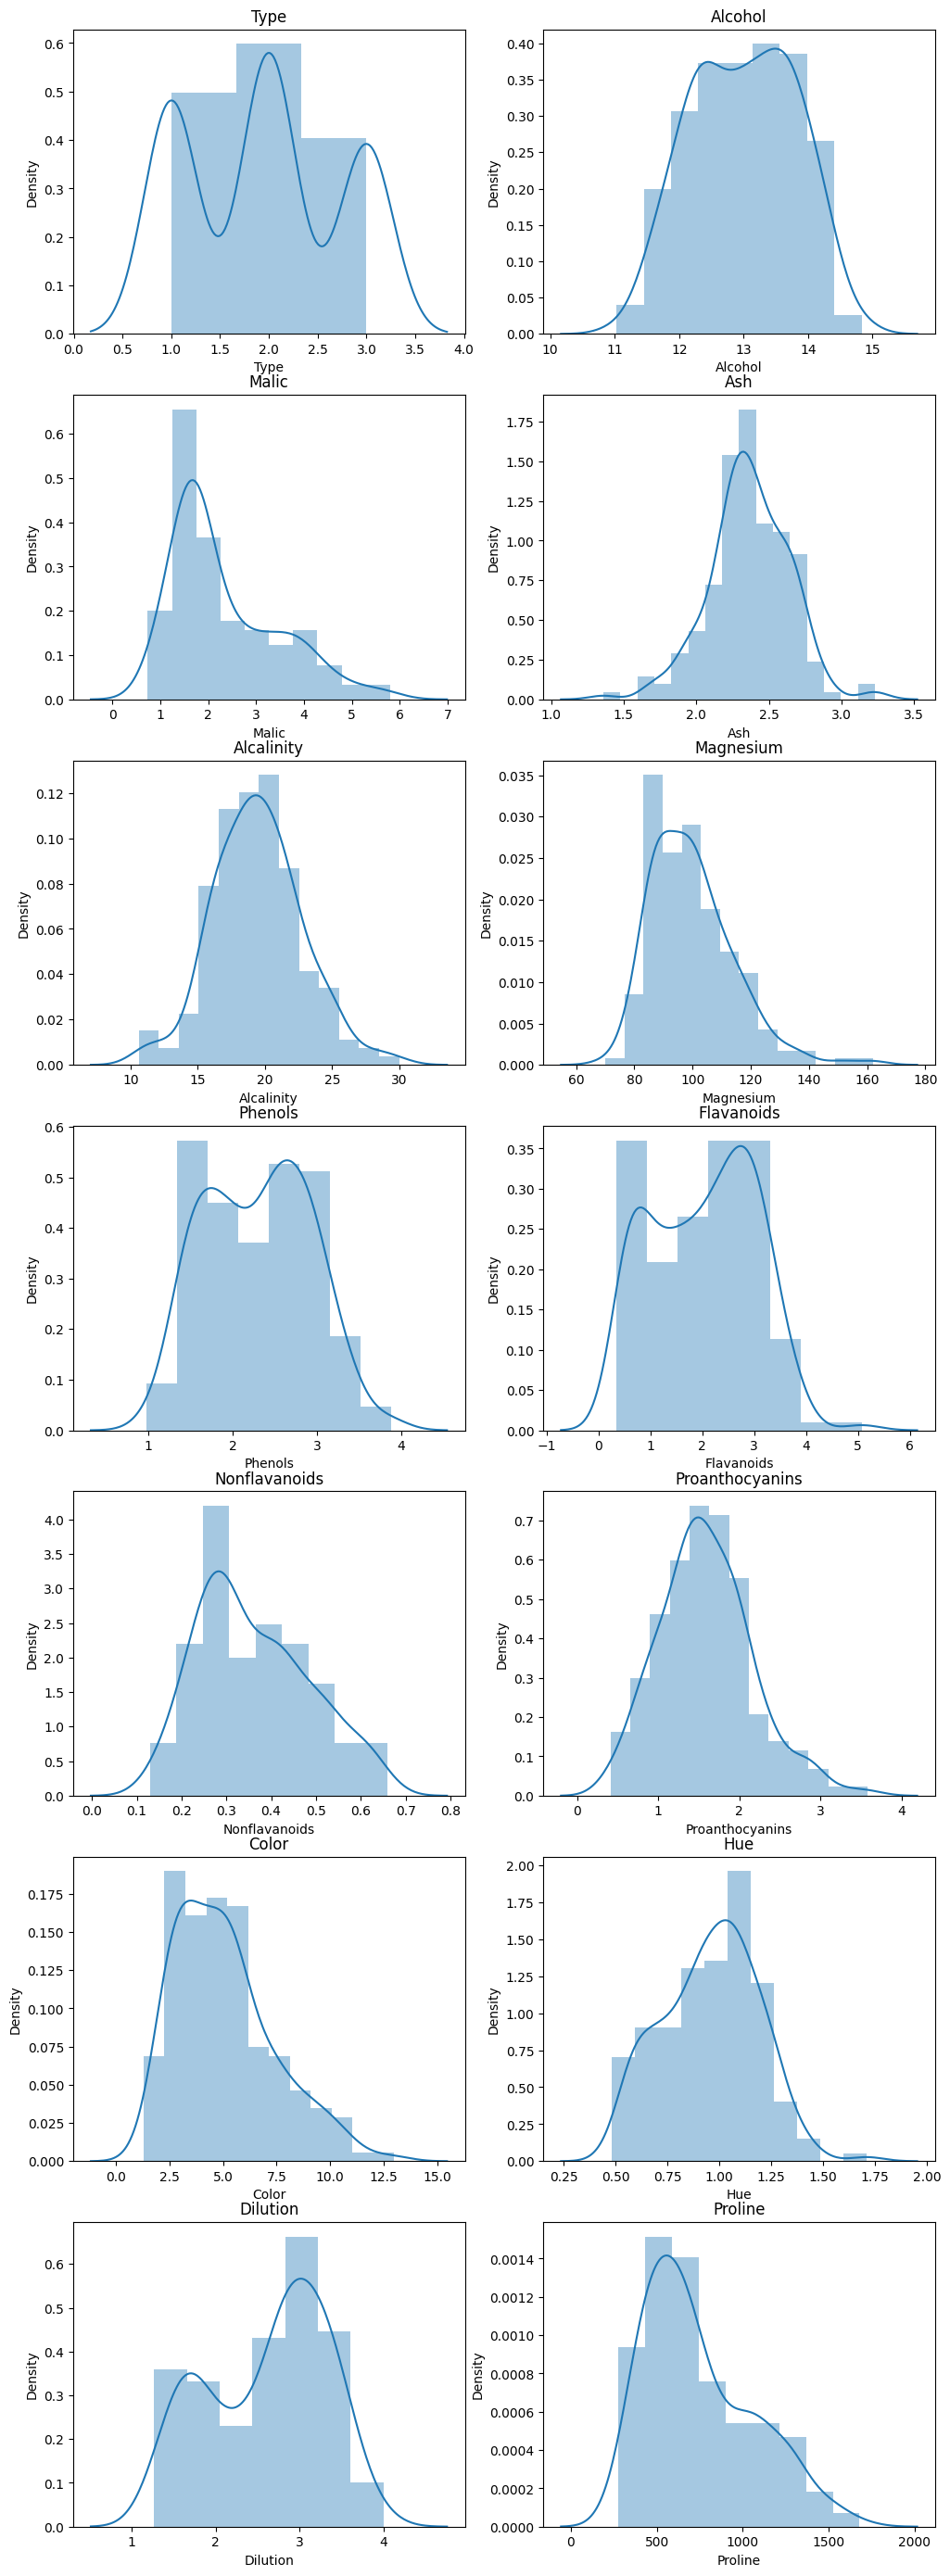

In [12]:
# distribution plots
subplots_per_row = 2
num_rows = (len(new_data.columns) + subplots_per_row - 1) // subplots_per_row
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(new_data.columns):
    ax = axes[i]
    sns.distplot(new_data[column], kde=True, ax=ax)
    ax.set_title(column)
    
# Hide any remaining empty subplots
for i in range(len(new_data.columns), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


### Histogram & Probability Plot (Q-Q plot)

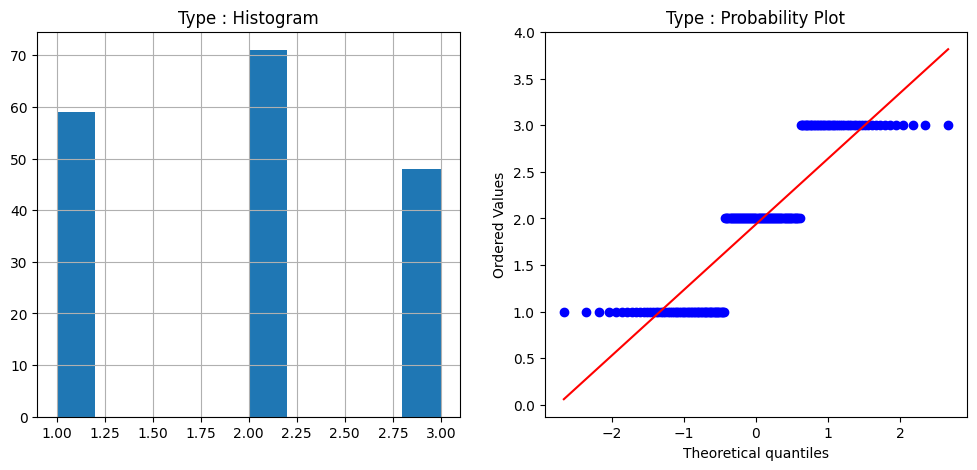

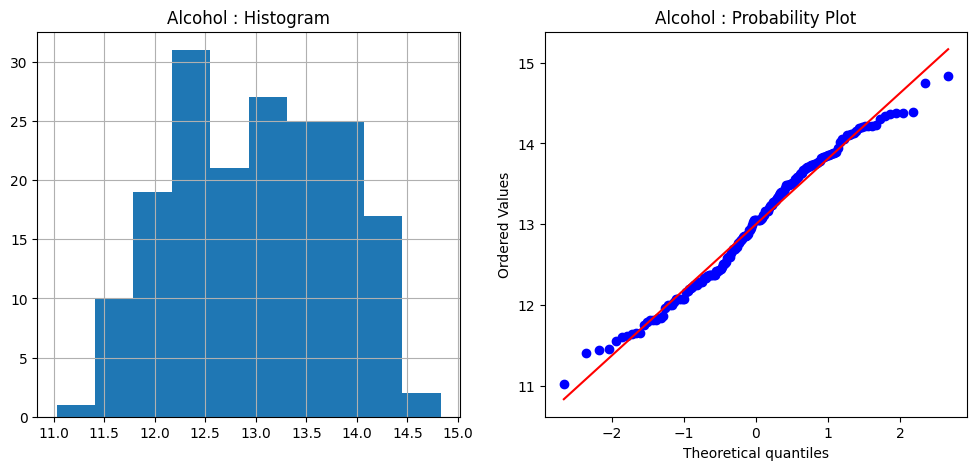

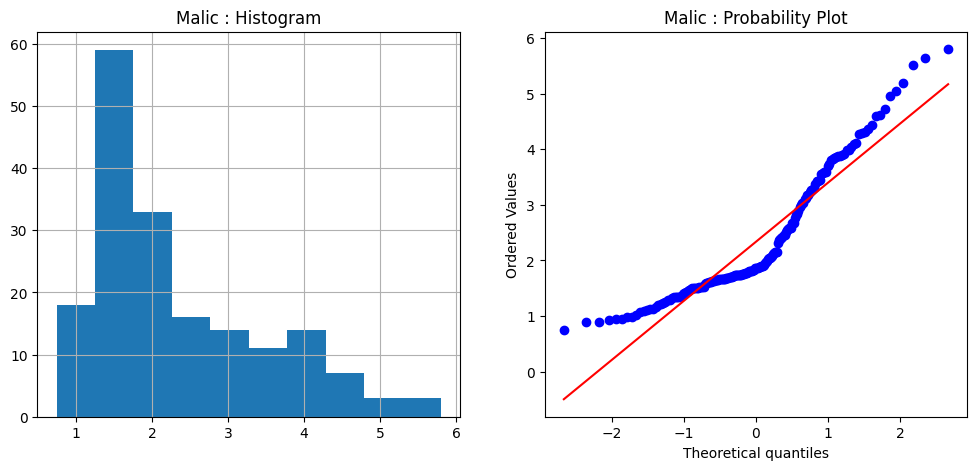

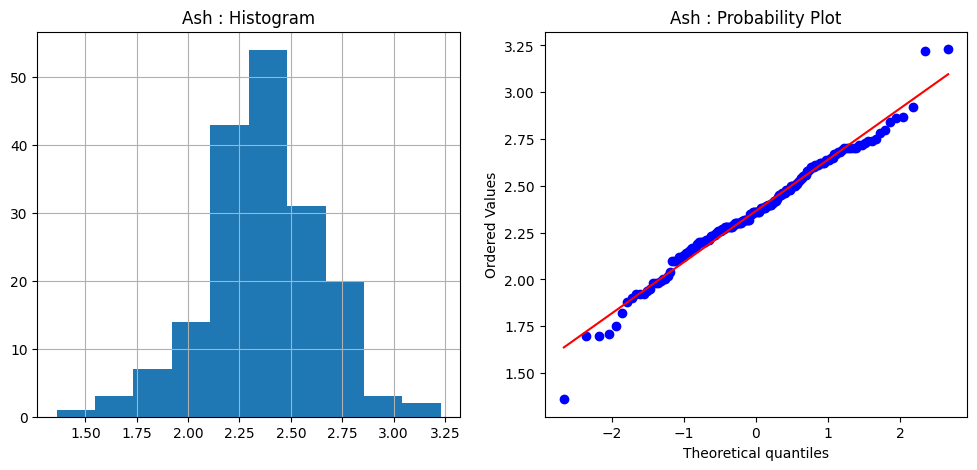

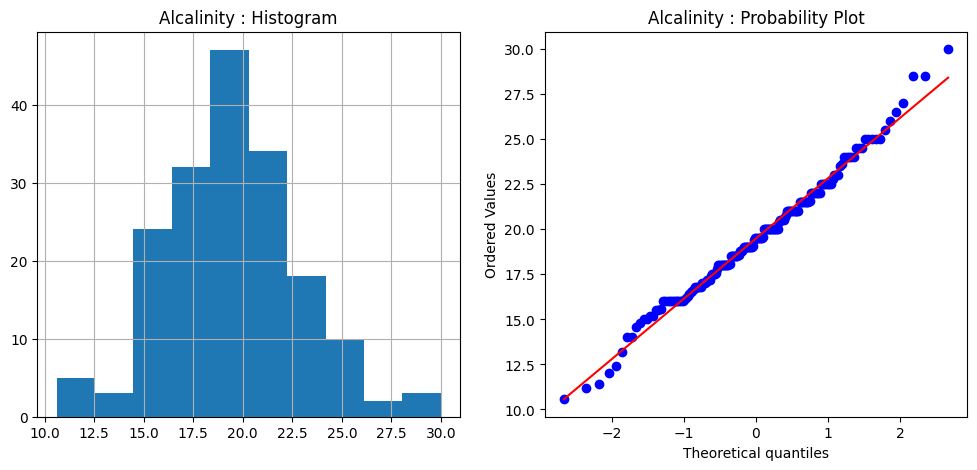

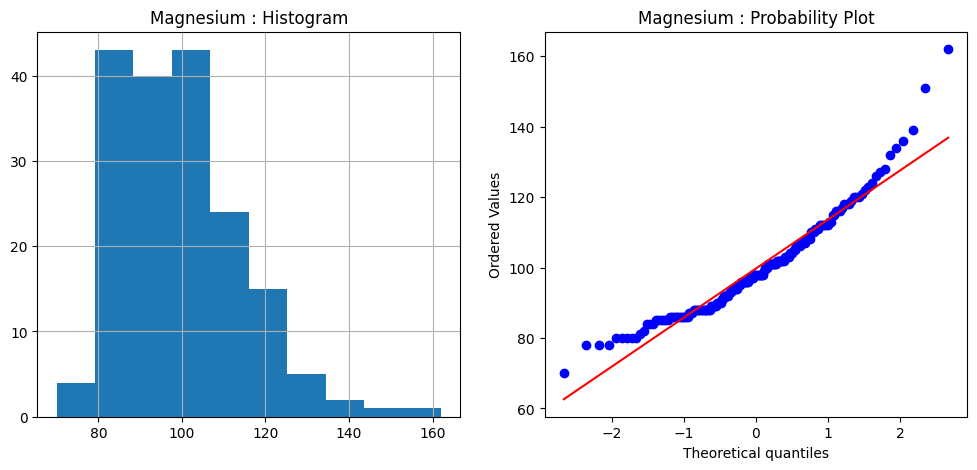

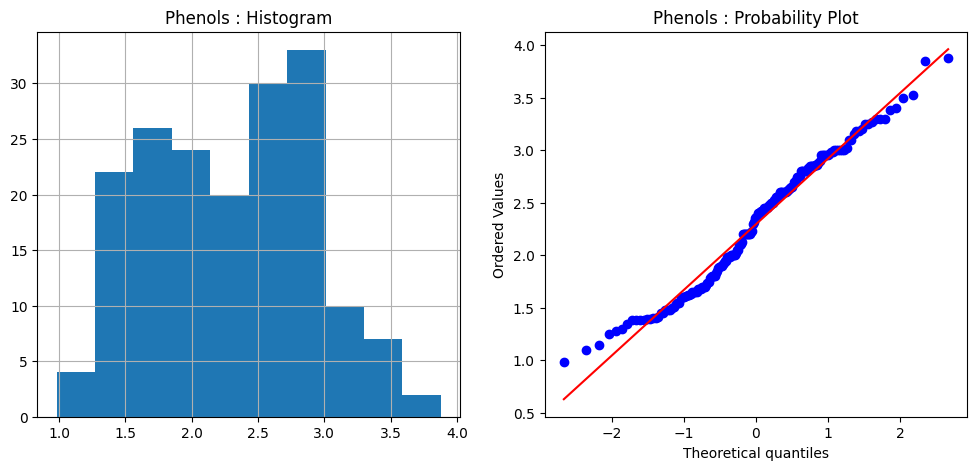

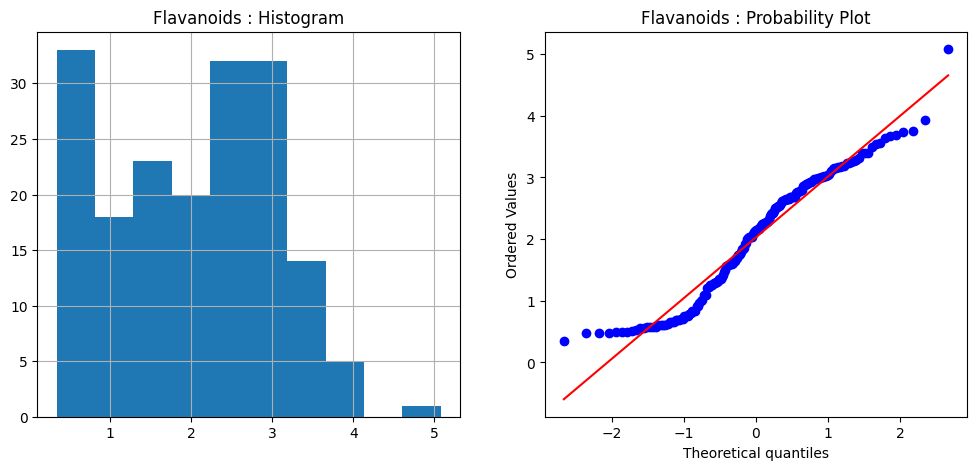

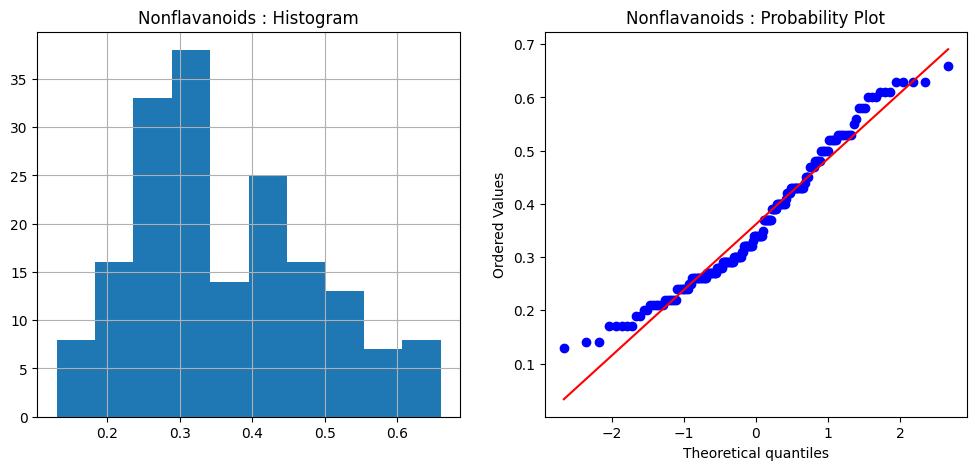

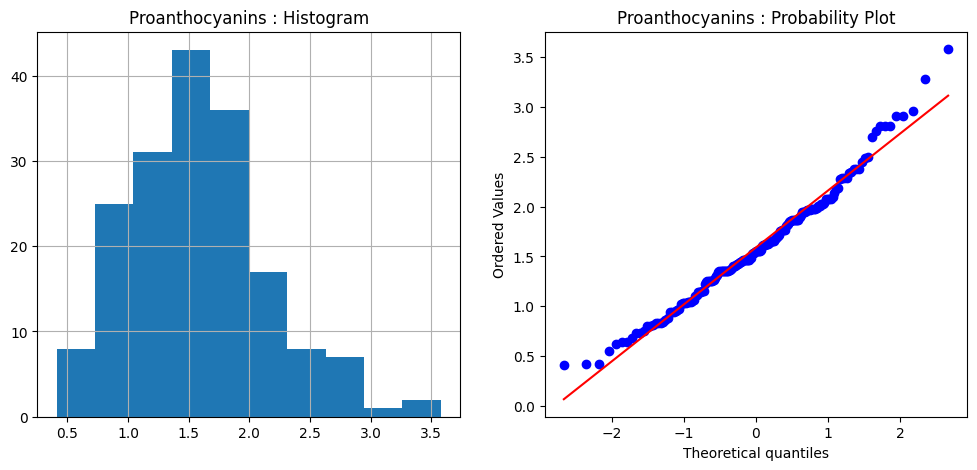

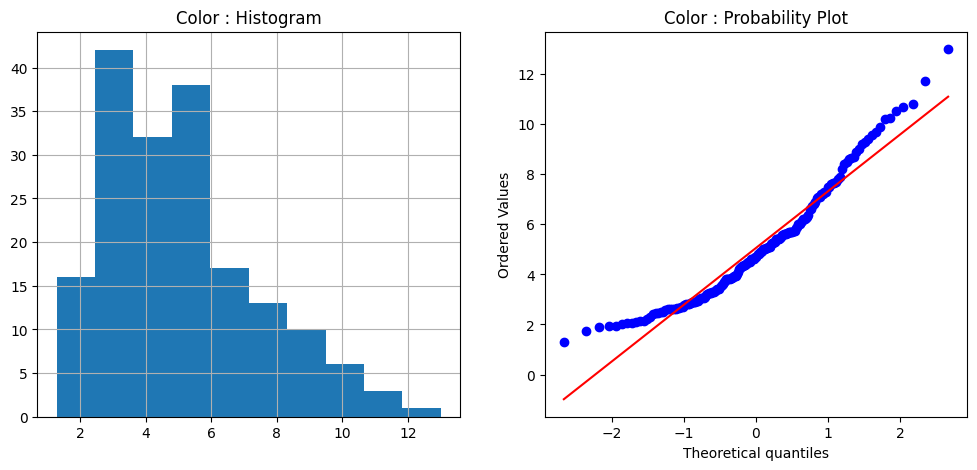

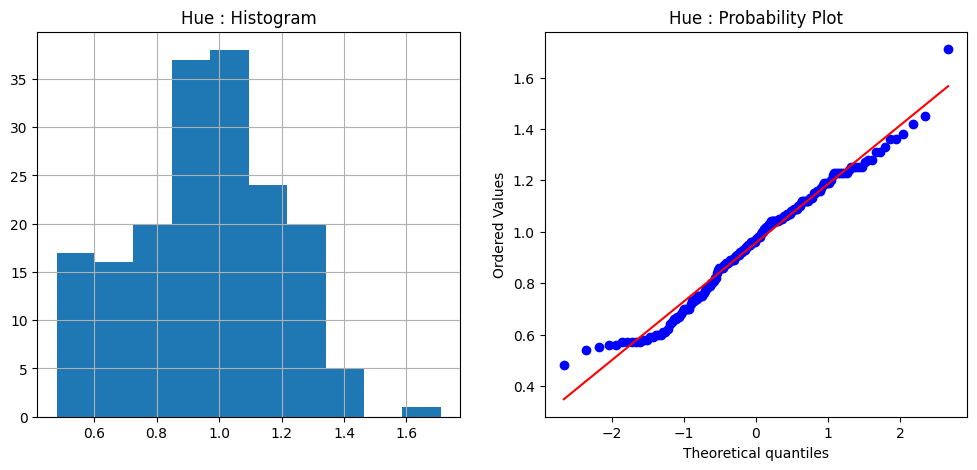

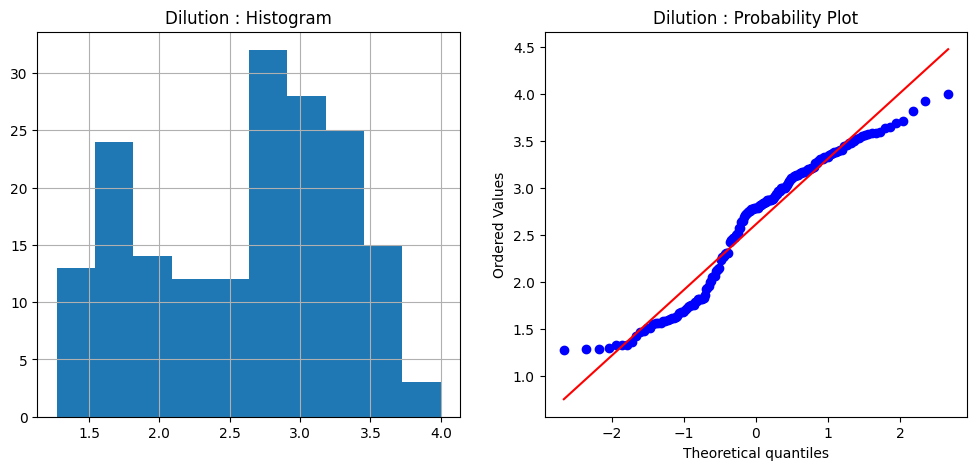

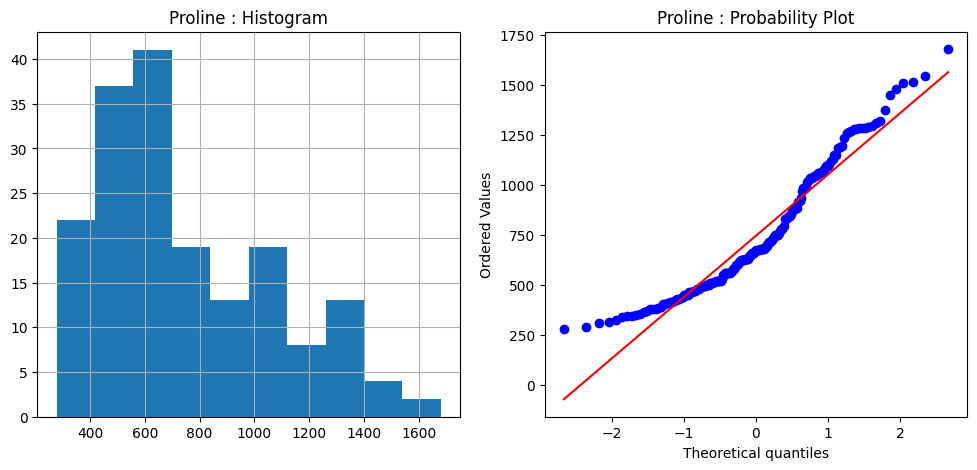

In [13]:
# Histogram & Probability Plot (Q-Q plot)
import pylab
import scipy.stats as stat

def plot_data(df, feature):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.title(f'{feature} : Histogram')
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(f'{feature} : Probability Plot')

# Iterate through all columns
for column in new_data.columns:
    plot_data(new_data, column)
    plt.show()


## Principal Component Analysis 

### Feature scaling

In [14]:
data1=data.iloc[:,1:]
# Normalizing the numerical data 
data1_norm=scale(data1)

In [15]:
# Perform PCA - first 4 pca components
pca = PCA(n_components = 4)
pca_values = pca.fit_transform(data1_norm)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(var,decimals = 8)*100)

print("\nThe amount of variance that each PCA explains is: ",var1)


The amount of variance that each PCA explains is:  [36.198848 55.406338 66.529969 73.598999]


In [16]:
# Perform PCA - All pca components
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(data1_norm)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(var,decimals = 8)*100)

print("pca_values is: ",pca_values.shape)
print("\npca.components_ is: ",pca.components_.shape)
print("\nThe var is: ",var)
print("\nThe amount of variance that each PCA explains is: ",var1)


pca_values is:  (178, 13)

pca.components_ is:  (13, 13)

The var is:  [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]

The amount of variance that each PCA explains is:  [ 36.198848  55.406338  66.529969  73.598999  80.162293  85.098116
  89.336795  92.017544  94.239697  96.169716  97.906552  99.204785
 100.      ]


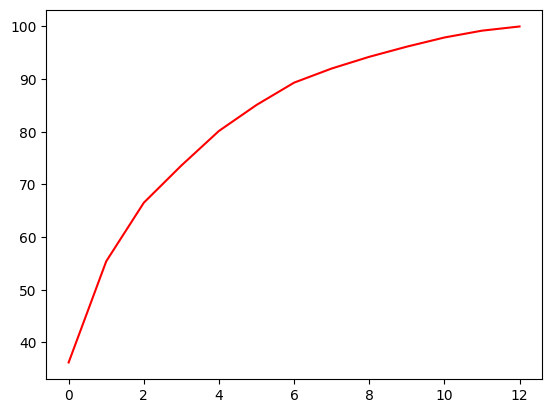

In [17]:
plt.plot(var1,color="red")
plt.show()

In [18]:
# Final Dataframe
Final_df=pd.concat([data['Type'],pd.DataFrame(pca_values[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
Selected_pca=Final_df.iloc[:,1:]
Final_df

Type       PC1       PC2       PC3
0       1  3.316751 -1.443463 -0.165739
1       1  2.209465  0.333393 -2.026457
2       1  2.516740 -1.031151  0.982819
3       1  3.757066 -2.756372 -0.176192
4       1  1.008908 -0.869831  2.026688
..    ...       ...       ...       ...
173     3 -3.370524 -2.216289 -0.342570
174     3 -2.601956 -1.757229  0.207581
175     3 -2.677839 -2.760899 -0.940942
176     3 -2.387017 -2.297347 -0.550696
177     3 -3.208758 -2.768920  1.013914

[178 rows x 4 columns]

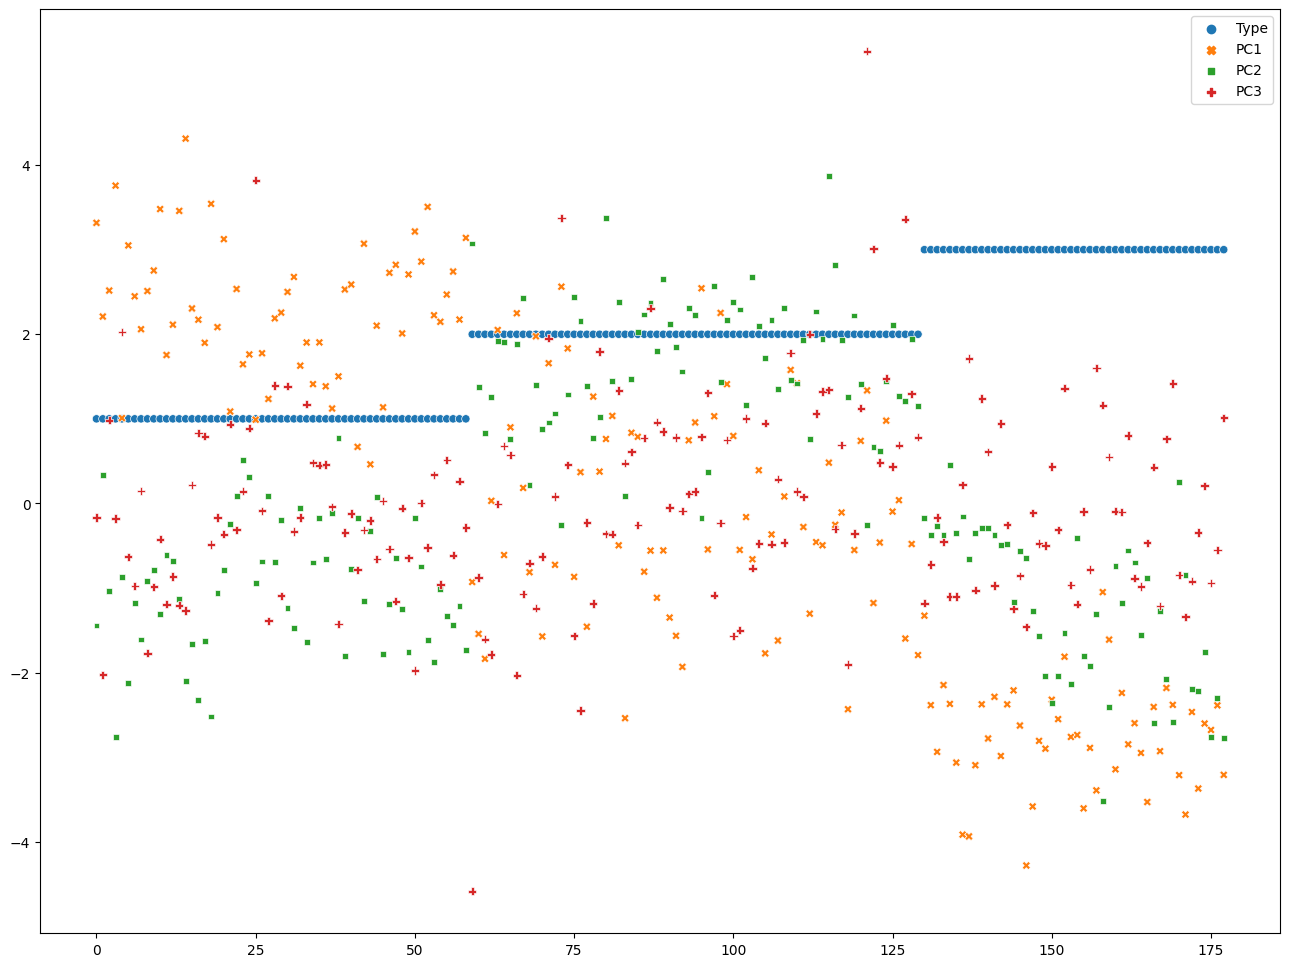

In [19]:
# Visualization of PCAs
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=Final_df)
plt.show()

### Hierarchical clustering

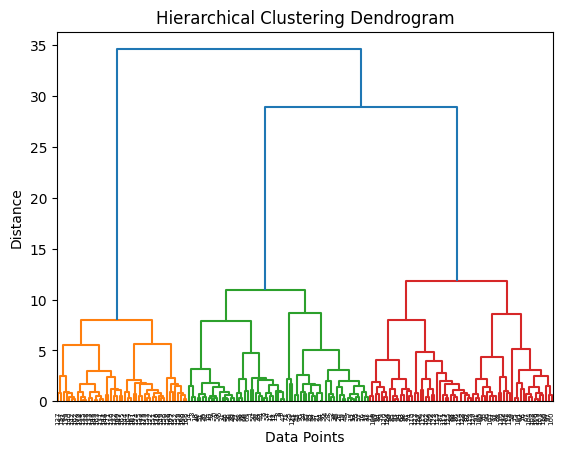

Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2
 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 
 Counts: (array([0, 1, 2], dtype=int64), array([66, 47, 65], dtype=int64))

      Type  HC_Cluster
0       1           1
1       1           1
2       1           1
3       1           1
4       1           1
..    ...         ...
173     3           2
174     3           2
175     3           2
176     3           2
177     3           2

[178 rows x 2 columns]
Number of rows with mismatched clusters: 54


In [20]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical clustering
df = Selected_pca.copy()

# Linkage matrix
linkage_matrix = linkage(df, method='ward')     # method='complete'

# Dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Agglomerative clustering
n_clusters = 3  
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')   #affinity='euclidean', linkage='complete'
# df['HC_Cluster'] = agg_clustering.fit_predict(df)
Final_df['HC_Cluster'] = agg_clustering.fit_predict(df)
labels_pred = agg_clustering.fit_predict(df)
print("Labels:" , labels_pred, "\n Counts:",np.unique(labels_pred, return_counts=True))

# Create a mapping to align cluster labels with original class labels
cluster_mapping = {}
for cluster_label in Final_df['HC_Cluster'].unique():
    class_labels_in_cluster = Final_df.loc[Final_df['HC_Cluster'] == cluster_label, 'Type'].unique()
    dominant_class_label = max(class_labels_in_cluster, key=list(class_labels_in_cluster).count)
    cluster_mapping[cluster_label] = dominant_class_label

# Apply the mapping to align cluster labels with original class labels
Final_df['HC_Cluster'] = Final_df['HC_Cluster'].map(cluster_mapping)

# Compare the clustering results with the original class labels
comparison_df = pd.DataFrame({'Type': Final_df['Type'], 'HC_Cluster': Final_df['HC_Cluster']})
print('\n',comparison_df)
# Count the number of rows where Type and HC_Cluster are not equal
mismatch_count = (comparison_df['Type'] != comparison_df['HC_Cluster']).sum()
print(f'Number of rows with mismatched clusters: {mismatch_count}')


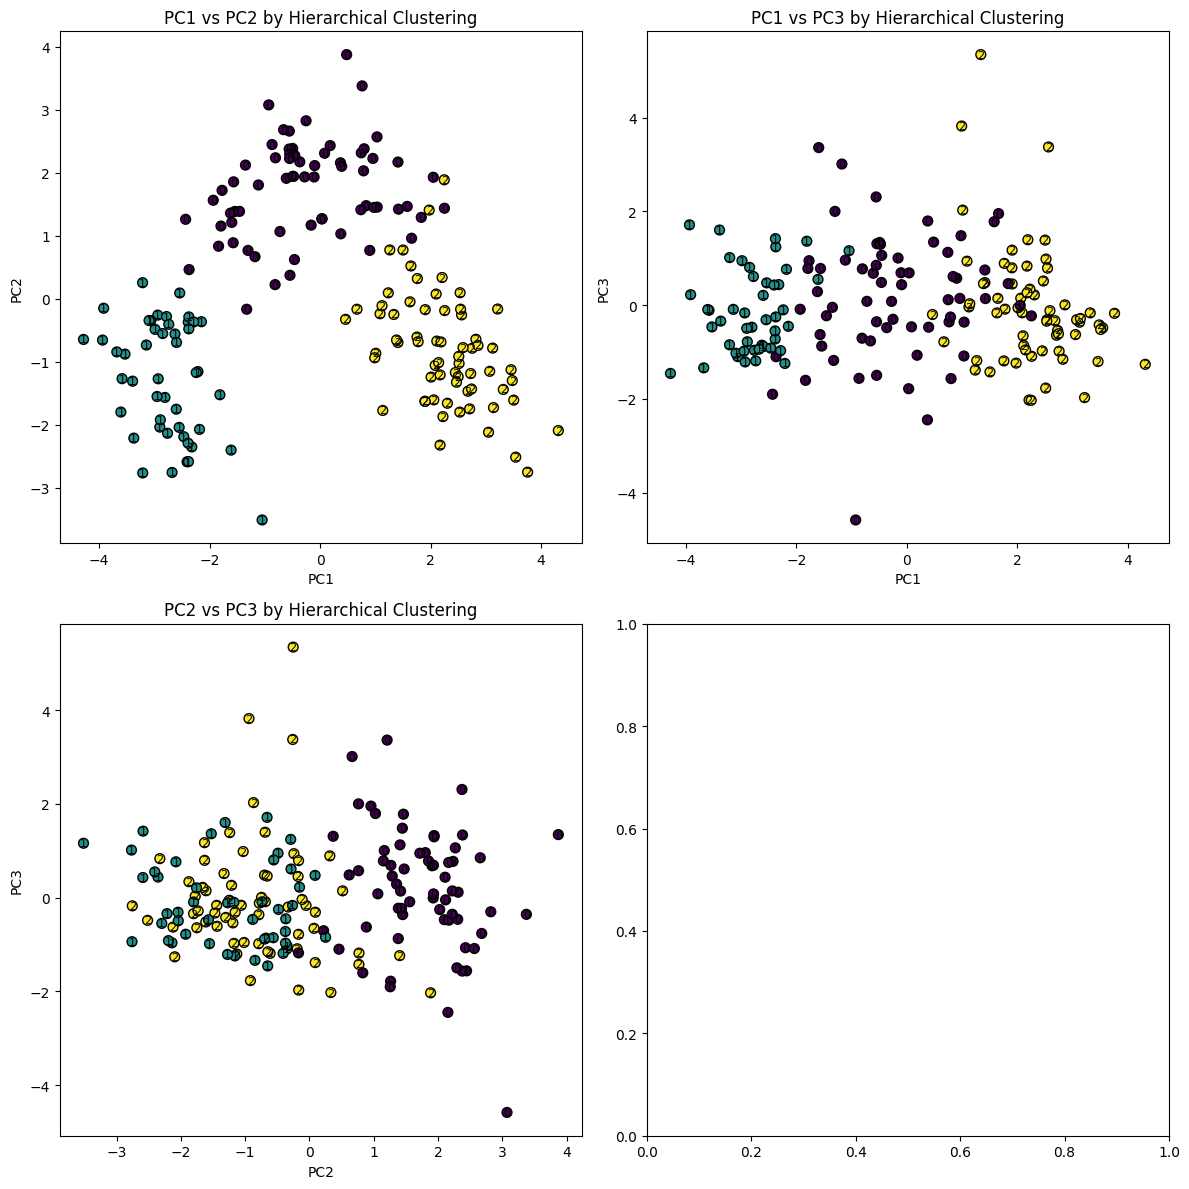

In [21]:
# Plot with Label Number
from scipy.special import comb
data_columns = df.columns     #[df.columns != cluster_column]
X=np.array(df)

num_columns = len(data_columns)
num_rows = int(np.ceil(comb(3, 2) / 2))  # Ensure an even number of columns doesn't leave an empty subplot
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows))

count=0
for i, col1 in enumerate(df):
    for j, col2 in enumerate(df):
        if i != j and i<j :  # Avoid plotting the same column against itself
            row_index = (count) // 2
            col_index = count % 2
            count=count+1
            # Scatter plot
            axes[row_index, col_index].scatter(X[:, i], X[:, j], c=labels_pred, cmap='viridis', s=50, edgecolors='k')

            # Add cluster labels to each point
            for k, label in enumerate(labels_pred):
                axes[row_index, col_index].text(X[k, i], X[k, j], str(label), fontsize=8, ha='center', va='center')
            axes[row_index, col_index].set_title(f'{col1} vs {col2} by Hierarchical Clustering')
            axes[row_index, col_index].set_xlabel(col1)
            axes[row_index, col_index].set_ylabel(col2)

# Adjust layout
plt.tight_layout()
plt.show()


### visualize with 3d plot

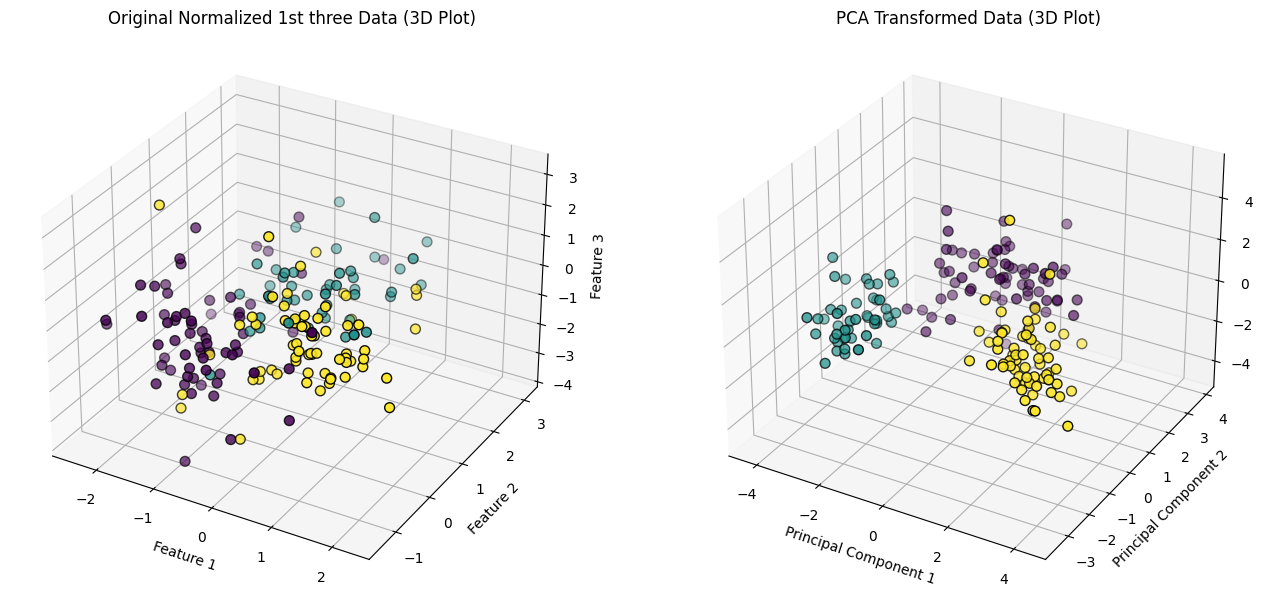

In [22]:
# Create 3D subplots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 10))

# Original 3D plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(data1_norm[:, 0], data1_norm[:, 1], data1_norm[:, 2],c=labels_pred, cmap='viridis', s=50, edgecolors='k')
ax1.set_title('Original Normalized 1st three Data (3D Plot)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')

# PCA-transformed 3D plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_pred, cmap='viridis', s=50, edgecolors='k')
ax2.set_title('PCA Transformed Data (3D Plot)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')

# plt.tight_layout()
plt.show()

### K-means clustering with elbow curve

#### Elbow Method - to find the optimal number of clusters (k)

Plot the sum of squared distances (inertia) for different values of k.  
Look for the "elbow" point where the rate of decrease slows down.   
The point where adding more clusters provides diminishing returns is often a good choice for k.

[1539.5034801883069, 886.16113648235, 512.9995067661519, 429.6196798263029, 370.9180066061714, 325.0311346396022, 287.72056590139556, 266.6229565532758, 241.44497427840514, 217.67945500942497]


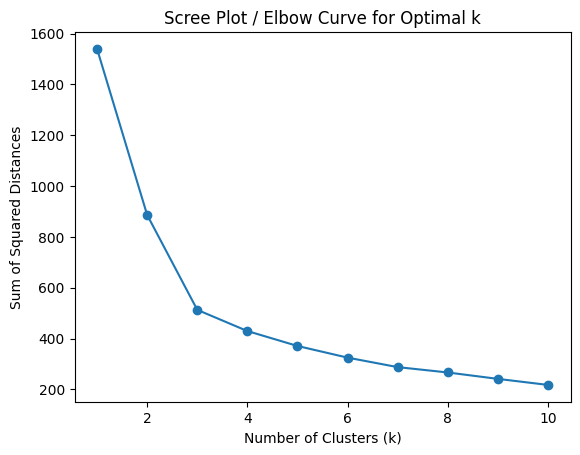

In [23]:
# Calculate sum of squared distances for different values of k
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Selected_pca)
    inertia_values.append(kmeans.inertia_)    
print(inertia_values)

# Plot the elbow graph
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Scree Plot / Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

### Silhouette Score - to find the optimal number of clusters (k)

Compute the silhouette score for different values of k.     
Choose the k with the highest silhouette score, where values range from -1 to 1, and higher values indicate better-defined clusters.

0.38938813089003294
0.4532351215683952
0.4110296819768858
0.3595960426655139
0.30774909572753406
0.32801013437434073
0.27982142029039153
0.30027009262133314
0.30576050741931937


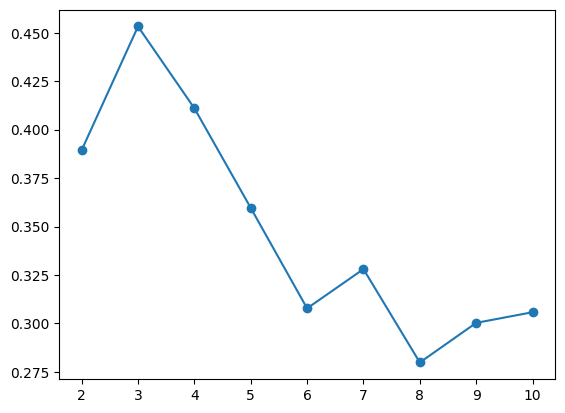

In [24]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(Selected_pca)
    score=silhouette_score(Selected_pca, labels)
    print(score)
    silhouette_scores.append(score)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.show()


### Davies-Bouldin Index - to find the optimal number of clusters (k)

A lower Davies-Bouldin index indicates better clustering.       
Iterate over different values of k and choose the one that minimizes the Davies-Bouldin index.

1.0730776793454364
0.8399714333905451
1.0171104244356062
1.0739767063412522
1.1387541407620025
1.0078214359406066
1.092901499483677
0.9983489084557865
0.9581565847450972


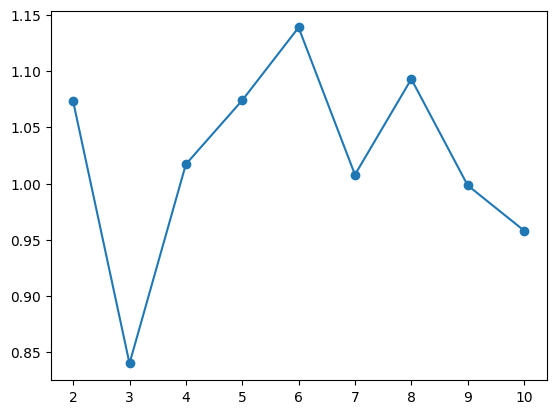

In [25]:
from sklearn.metrics import davies_bouldin_score
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(Selected_pca)
    score=davies_bouldin_score(Selected_pca, labels)
    print(score)
    db_scores.append(score)
plt.plot(range(2, 11), db_scores, marker='o')
plt.show()


Note: Best clustering number is Three

In [26]:
# Choose the optimal number of clusters based on the elbow plot
optimal_k = 3 

df = Selected_pca.copy()

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels_pred = kmeans.fit_predict(df)
print("Labels:" , labels_pred, "\n Counts:",np.unique(labels_pred, return_counts=True))

Final_df['KMeans_Cluster'] = kmeans.fit_predict(df)
# Create a mapping to align cluster labels with original class labels
cluster_mapping = {}
for cluster_label in Final_df['KMeans_Cluster'].unique():
    class_labels_in_cluster = Final_df.loc[Final_df['KMeans_Cluster'] == cluster_label, 'Type'].unique()
    dominant_class_label = max(class_labels_in_cluster, key=list(class_labels_in_cluster).count)
    cluster_mapping[cluster_label] = dominant_class_label

# Apply the mapping to align cluster labels with original class labels
Final_df['KMeans_Cluster'] = Final_df['KMeans_Cluster'].map(cluster_mapping)

# Compare the clustering results with the original class labels
comparison_df = pd.DataFrame({'Type': Final_df['Type'], 'KMeans_Cluster': Final_df['KMeans_Cluster']})
print('\n',comparison_df)
# Count the number of rows where Type and KMeans_Cluster are not equal
mismatch_count = (comparison_df['Type'] != comparison_df['KMeans_Cluster']).sum()
print(f'Number of rows with mismatched clusters: {mismatch_count}')


Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 
 Counts: (array([0, 1, 2]), array([51, 63, 64], dtype=int64))

      Type  KMeans_Cluster
0       1               1
1       1               1
2       1               1
3       1               1
4       1               1
..    ...             ...
173     3               2
174     3               2
175     3               2
176     3               2
177     3               2

[178 rows x 2 columns]
Number of rows with mismatched clusters: 52


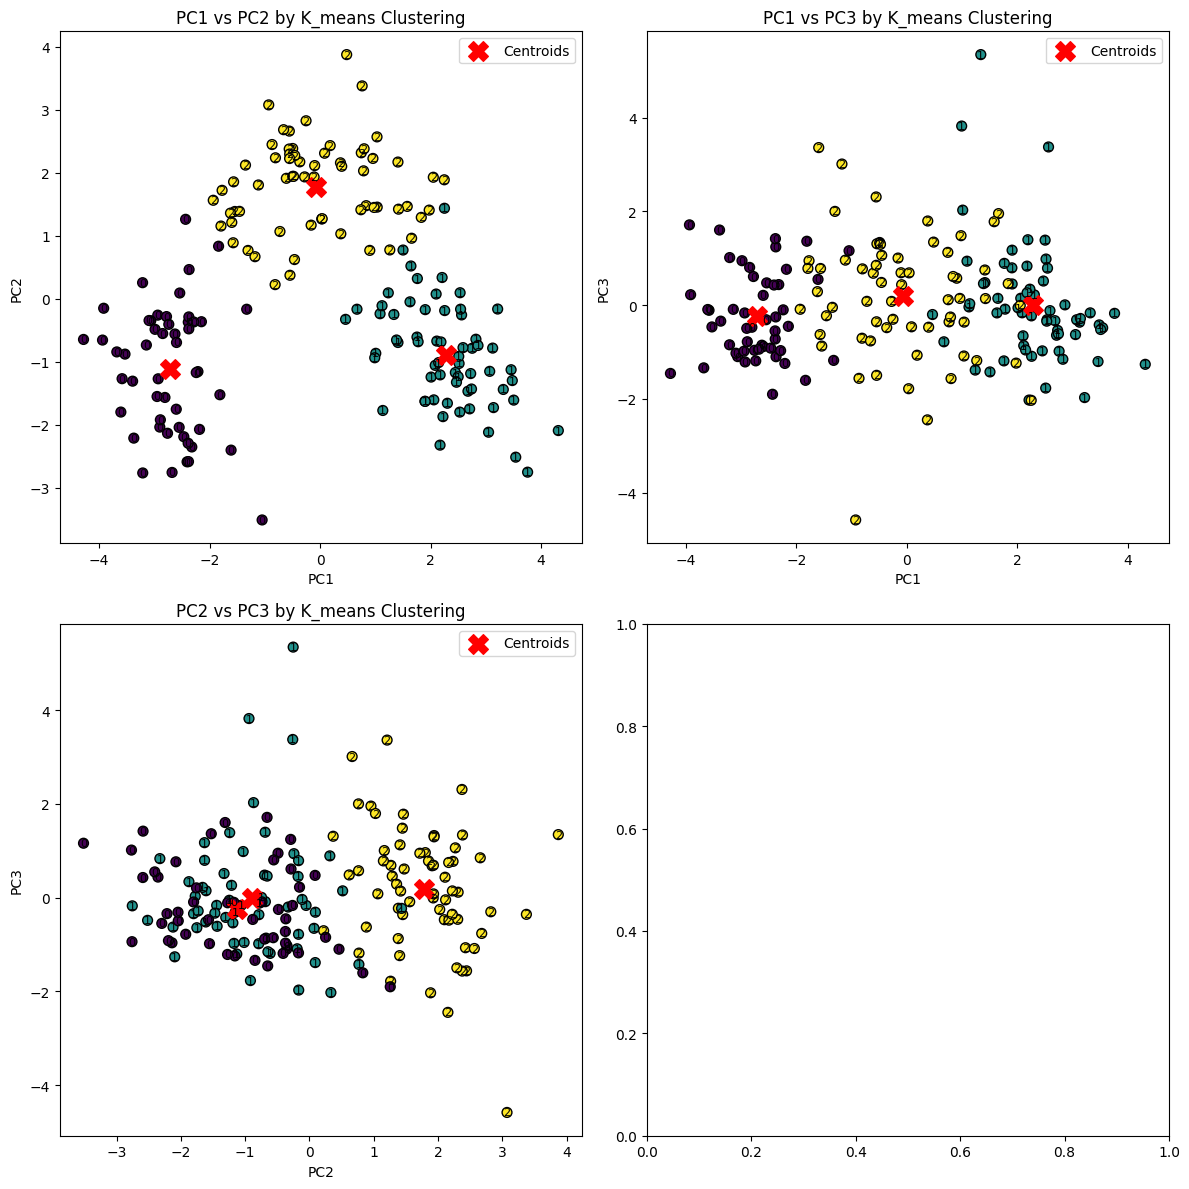

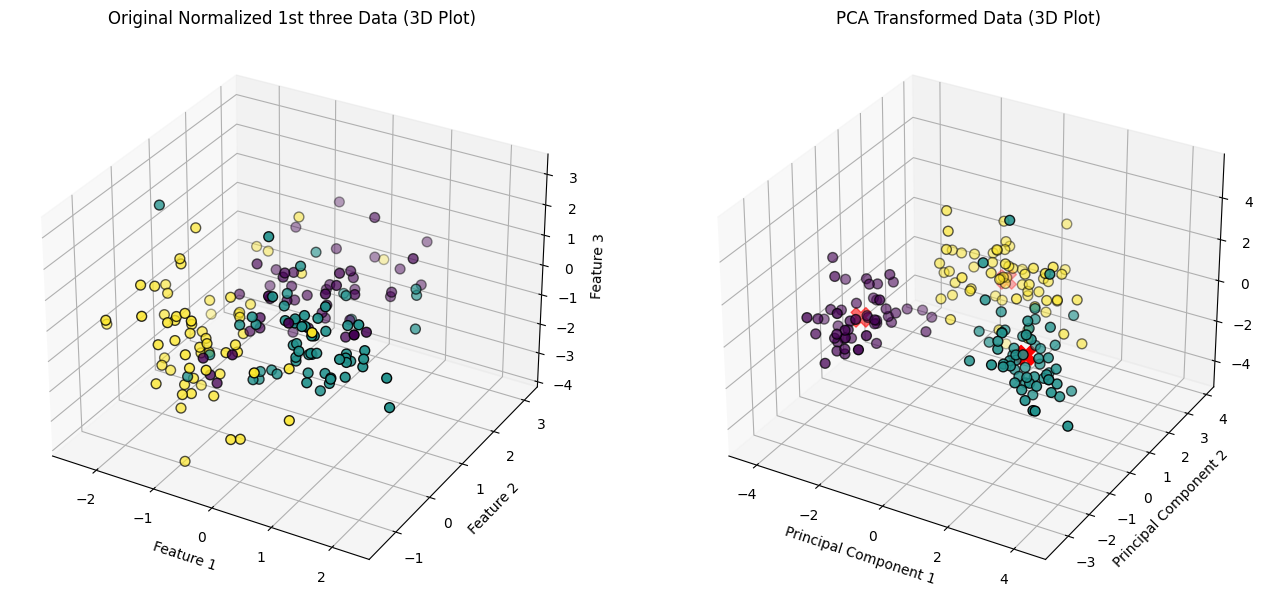

In [27]:
#Plot the clusters
data_columns = df.columns
num_columns = len(data_columns)
num_rows = int(np.ceil(comb(num_columns, 2) / 2))  # Ensure an even number of columns doesn't leave an empty subplot
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows))

count=0
for i, col1 in enumerate(data_columns):
    for j, col2 in enumerate(data_columns):
        if i != j and i<j :  # Avoid plotting the same column against itself
            row_index = (count) // 2
            col_index = count % 2
            count+=1

            # Scatter plot
            axes[row_index, col_index].scatter(X[:, i], X[:, j], c=labels_pred, cmap='viridis', s=50, edgecolors='k')
            axes[row_index, col_index].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, j], c='red', marker='X', s=200, label='Centroids')
            axes[row_index, col_index].legend()

            # Add cluster labels to each point
            for k, label in enumerate(labels_pred):
                axes[row_index, col_index].text(X[k, i], X[k, j], str(label), fontsize=8, ha='center', va='center')
            axes[row_index, col_index].set_title(f'{col1} vs {col2} by K_means Clustering')
            axes[row_index, col_index].set_xlabel(col1)
            axes[row_index, col_index].set_ylabel(col2)
            

# Adjust layout
plt.tight_layout()
plt.show()

#--------------------------------------------------------------------------------------------
# Create 3D plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 10))

# Original 3D plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(data1_norm[:, 0], data1_norm[:, 1], data1_norm[:, 2],c=labels_pred, cmap='viridis', s=50, edgecolors='k')
ax1.set_title('Original Normalized 1st three Data (3D Plot)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')

# PCA-transformed 3D plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_pred, cmap='viridis', s=50, edgecolors='k')
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Centroids')
ax2.set_title('PCA Transformed Data (3D Plot)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')

# plt.tight_layout()
plt.show()


### DBScan clustering

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df = Selected_pca.copy()
dbscan = DBSCAN(eps=1.05, min_samples=2)
dbscan.fit_predict(df)

# Extract cluster labels and outliers #Noisy samples are given the label -1.
labels_pred=dbscan.labels_
Final_df['DB_Scan_Cluster'] = labels_pred
labels_pred = labels_pred
print("Labels:" , labels_pred, "\n Counts:",np.unique(labels_pred, return_counts=True))

# Create a mapping to align cluster labels with original class labels
cluster_mapping = {}
for cluster_label in Final_df['DB_Scan_Cluster'].unique():
    class_labels_in_cluster = Final_df.loc[Final_df['DB_Scan_Cluster'] == cluster_label, 'Type'].unique()
    dominant_class_label = max(class_labels_in_cluster, key=list(class_labels_in_cluster).count)
    cluster_mapping[cluster_label] = dominant_class_label

# Apply the mapping to align cluster labels with original class labels
Final_df['DB_Scan_Cluster'] = Final_df['DB_Scan_Cluster'].map(cluster_mapping)

# Compare the clustering results with the original class labels
comparison_df = pd.DataFrame({'Type': Final_df['Type'], 'DB_Scan_Cluster': Final_df['DB_Scan_Cluster']})
print('\n',comparison_df)
# Count the number of rows where Type and DB_Scan_Cluster are not equal
mismatch_count = (comparison_df['Type'] != comparison_df['DB_Scan_Cluster']).sum()
print(f'Number of rows with mismatched clusters: {mismatch_count}')

Labels: [ 0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0 -1  0  0  0  0
  0 -1  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  2 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0] 
 Counts: (array([-1,  0,  1,  2], dtype=int64), array([ 10, 163,   3,   2], dtype=int64))

      Type  DB_Scan_Cluster
0       1                1
1       1                1
2       1                1
3       1                1
4       1                1
..    ...              ...
173     3                1
174     3                1
175     3                1
176     3                1
177     3                1

[178 rows x 2 columns]
Number o

In [29]:
Final_df

Type       PC1       PC2       PC3  HC_Cluster  KMeans_Cluster  \
0       1  3.316751 -1.443463 -0.165739           1               1   
1       1  2.209465  0.333393 -2.026457           1               1   
2       1  2.516740 -1.031151  0.982819           1               1   
3       1  3.757066 -2.756372 -0.176192           1               1   
4       1  1.008908 -0.869831  2.026688           1               1   
..    ...       ...       ...       ...         ...             ...   
173     3 -3.370524 -2.216289 -0.342570           2               2   
174     3 -2.601956 -1.757229  0.207581           2               2   
175     3 -2.677839 -2.760899 -0.940942           2               2   
176     3 -2.387017 -2.297347 -0.550696           2               2   
177     3 -3.208758 -2.768920  1.013914           2               2   

     DB_Scan_Cluster  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
..               ...  
173                1  
174                1  
175                1  
176                1  
177                1  

[178 rows x 7 columns]